## Final Project Submission

Please fill out:
* Student name: JACINTA WANJIRU MUKII
* Student pace: Full time
* Scheduled project review date/time: 28th May 2023
* Instructor name: Veronica Isiaho
* Blog post URL: https://github.com/JacintaMukii/Phase_1_project 


# Project Overview
For this project, exploratory data analysis was used to generate insights for a business stakeholder.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Main Objective

Exploring the data collected from movie sites then translating those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Specific objectives

1.To get the most popular genres

2.To check the most popular studios

3.To use the domestic gross to estimate budget used and how it affects the ratings.

# Data Processing


### Loading the data

In [1]:
#Importing necessary packages
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the movie_gross dataset

In [2]:
# Your code here - remember to use markdown cells for comments as well!
movie_gross = pd.read_csv('Data/bom.movie_gross.csv')

#### Inspecting the data 

In [3]:
#Displaying the first rows
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#Displaying the last rows
movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
#A summary of the dataset
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the info, there are null values/missing values in the following columns: Studio, domestic_gross and foreign_gross

In [6]:
#Getting the number of rows and columns in the dataset
movie_gross.shape

(3387, 5)

There are 3387 rows and 5 columns in the dataset.

In [7]:
#A summary of all numerical columns in the dataset
movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Loading the movies_and_budgets dataset

In [8]:
movies_and_budgets =  pd.read_csv('Data/tn.movie_budgets.csv')

#### Inspecting the data

In [9]:
#Displaying the first rows
movies_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
#Displaying the last rows
movies_and_budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [11]:
#A summary of the dataset
movies_and_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
#Getting the number of rows and columns in the dataset
movies_and_budgets.shape

(5782, 6)

In [13]:
#Getting a summary of all numerical columns in the dataset
movies_and_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


### Loading the tdmb_movies dataset

In [14]:
tdmb_movies =  pd.read_csv('Data/tmdb.movies.csv')

#### Inspecting the data

In [15]:
#Displaying the first rows
tdmb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
#Displaying the last rows
tdmb_movies.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [17]:
#Getting a summary of the dataset
tdmb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


There are no missing values in this dataset.

There are 26517 rows  and 10 columns.

There are 3 data types: float, integers and objects.

In [18]:
#Displaying the no of columns and rows
tdmb_movies.shape

(26517, 10)

In [19]:
#Getting a summary of the numerical columns in the dataset
tdmb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


### Loading the reviews dataset

In [20]:
reviews = pd.read_csv('Data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

#### Inspecting the data

In [21]:
#Displaying the first rows
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [22]:
#Displaying the last rows
reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [23]:
#A summary of the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


This summary shows the columns containing null values which include: review, rating,critic, and publisher.

In [24]:
#No of columns and rows in the dataset
reviews.shape

(54432, 8)

In [25]:
#Getting a summary of the numerical columns in the dataset
reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


### Loading the movie_info dataset

In [26]:
movie_info =  pd.read_csv('Data/rt.movie_info.tsv', delimiter='\t', encoding='latin1')

#### Inspecting the data

In [27]:
#Displaying the first rows
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [28]:
#Displaying the last rows
movie_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [29]:
#Getting a summary of the dataset
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [30]:
#The no of rows and columns in the dataset
movie_info.shape

(1560, 12)

In [31]:
#Getting a summary of the numerical columns in the dataset
movie_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


### Loading basics and  ratings data using sql

In [32]:
conn = sqlite3.connect('Data/im.db')

basics = pd.read_sql_query('SELECT* from movie_basics', conn)
ratings = pd.read_sql_query('SELECT* from movie_ratings', conn)

basics.to_csv('movie_basics.csv', index=False)
ratings.to_csv('movie_ratings.csv', index=False)

conn.close()

In [33]:
#Displaying the first rows of basics 
basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [34]:
#Displaying the last rows
basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [35]:
#Getting a summary of the dataset
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The dataset above has missing values in the following columns: original_title, runtime_minutes, and genres.

In [36]:
#The no of columns and rows in the dataset
basics.shape

(146144, 6)

In [37]:
#Getting a summary of the numerical columns of a dataset
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [38]:
#Displaying the first rows
ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
#Displaying the last rows
ratings.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [40]:
#Getting a summary of the dataset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The dataset above has no columns containing missing values.

In [41]:
#The no of rows and columns
ratings.shape

(73856, 3)

In [42]:
#Getting a summary of the numerical columns in the dataset
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### Data issues

1.Separate datasets

2.Duplicated values

3.Missing values

4.Conversion of datatype

# Data Cleaning


## 1. Merging datasets

#### Merging the basics and rating datasets

In [43]:
#Making copies of the datasets
basics_copy = basics.copy()
ratings_copy = ratings.copy()
gross = movie_gross.copy()

In [44]:
#Combining the basics and ratings datasets
new_df = basics_copy.merge(ratings_copy, on = 'movie_id', how = 'right')

#### Inspecting the merged data

In [45]:
#Displaying the first rows
new_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [46]:
new_df["averagerating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 73856 entries, 0 to 73855
Series name: averagerating
Non-Null Count  Dtype  
--------------  -----  
73856 non-null  float64
dtypes: float64(1)
memory usage: 577.1 KB


In [47]:
#Displaying the last rows
new_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9805820,Caisa,Caisa,2018,84.0,Documentary,8.1,25
73852,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",7.5,24
73853,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14
73854,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary,7.0,5
73855,tt9894098,Sathru,Sathru,2019,129.0,Thriller,6.3,128


In [48]:
#Getting a summary of the dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The merged dataset has missing values in the following columns: runtime_minutes and genres.

In [49]:
#Renaming of primary_title to title
new_df.rename(columns = {'primary_title': 'title'}, inplace = True)

In [50]:
#Confirming the renaming
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


#### Merging the new dataset to the gross dataset

In [51]:
#Merging of the new dataset above and the gross dataset
combined_df = new_df.merge(gross, on ='title')

#### Inspecting the combined dataset

In [52]:
##Displaying the first rows of the combines dataset
combined_df.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,42400000,2014
1,tt1171222,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,887000,2013
2,tt1181840,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",7.0,5494,Shout!,NaN,3400000,2014
3,tt1210166,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,34600000,2011
4,tt1212419,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,72500000,2010


In [53]:
#Displaying the first rows of the combined dataset
combined_df.tail()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3022,tt3399916,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",6.3,4185,Magn.,5200.0,NaN,2015
3023,tt3616916,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",6.7,28167,Magn.,177000.0,NaN,2016
3024,tt3748512,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,7.4,4977,Cohen,260000.0,NaN,2015
3025,tt7008872,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",7.0,18768,Focus,6800000.0,5000000,2018
3026,tt7048622,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",7.7,11168,Cohen,1000000.0,NaN,2018


In [54]:
#Getting a summary of the combined dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 283.9+ KB


In [55]:
#The no of columns and rows
combined_df.shape

(3027, 12)

In [56]:
#Getting a summary of the numerical columns of the combined dataset
combined_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


## 2. Duplicated values

In [57]:
#Checking for duplicates in the combined dataset
combined_df.duplicated().sum()

0

## 3. Missing values

#### Checking for missing values

In [58]:
#Checking for missing values in the combined dataset
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

The combined dataset has missing values in 4 columns, that is, runtime_minutes, genres, domestic_gross and foreign_gross.
In the next step, I will be removing these missing values in the different columns.

#### Handling missing values

In [59]:
#Filling missing values in the runtime_minutes column
combined_df['runtime_minutes'].fillna(combined_df['runtime_minutes'].mean(), inplace = True)

In [60]:
#Checking for missing values in the genres column
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [61]:
combined_df["genres"].fillna('Missing', inplace = True)

In [62]:
# Drop rows with the value 'missing' in the 'Genres' column
combined_df = combined_df.drop(combined_df[combined_df['genres'] == 'missing'].index)

# Print the updated DataFrame
print(combined_df.head())

    movie_id                            title                 original_title   
0  tt1043726           The Legend of Hercules         The Legend of Hercules  \
1  tt1171222                    Baggage Claim                  Baggage Claim   
2  tt1181840  Jack and the Cuckoo-Clock Heart  Jack et la mécanique du coeur   
3  tt1210166                        Moneyball                      Moneyball   
4  tt1212419                        Hereafter                      Hereafter   

   start_year  runtime_minutes                     genres  averagerating   
0        2014             99.0   Action,Adventure,Fantasy            4.2  \
1        2013             96.0                     Comedy            5.1   
2        2013             94.0  Adventure,Animation,Drama            7.0   
3        2011            133.0      Biography,Drama,Sport            7.6   
4        2010            129.0      Drama,Fantasy,Romance            6.5   

   numvotes  studio  domestic_gross foreign_gross  year  
0   

In [63]:
#Checking for missing values in the genres column
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [64]:
#Replacing missing values in the studio column
combined_df['studio'].fillna('Missing', inplace = True)

In [65]:
# Drop rows with the value 'missing' in the 'Genres' column
combined_df = combined_df.drop(combined_df[combined_df['studio'] == 'missing'].index)

# Print the updated DataFrame
print(combined_df.head())

    movie_id                            title                 original_title   
0  tt1043726           The Legend of Hercules         The Legend of Hercules  \
1  tt1171222                    Baggage Claim                  Baggage Claim   
2  tt1181840  Jack and the Cuckoo-Clock Heart  Jack et la mécanique du coeur   
3  tt1210166                        Moneyball                      Moneyball   
4  tt1212419                        Hereafter                      Hereafter   

   start_year  runtime_minutes                     genres  averagerating   
0        2014             99.0   Action,Adventure,Fantasy            4.2  \
1        2013             96.0                     Comedy            5.1   
2        2013             94.0  Adventure,Animation,Drama            7.0   
3        2011            133.0      Biography,Drama,Sport            7.6   
4        2010            129.0      Drama,Fantasy,Romance            6.5   

   numvotes  studio  domestic_gross foreign_gross  year  
0   

In [66]:
#Checking for missing values in the studio column
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                0
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [67]:
#Filling missing values with mean values
combined_df['domestic_gross'].fillna(combined_df['domestic_gross'].mean(), inplace = True)

In [68]:
#Checking for missing values in domestic gross column
combined_df.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                0
domestic_gross        0
foreign_gross      1195
year                  0
dtype: int64

In [69]:
#Dropping the column foreign_gross 39% missing values with no criteria of filling dropping the rows will reduce my dataset
combined_df = combined_df.drop('foreign_gross', axis = 'columns')

In [70]:
#confirming the column drop
combined_df.columns

Index(['movie_id', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'year'],
      dtype='object')

From this table above, there are no missing values in the dataset. We have succesfully removed all the missing values in the columns the 4 columns.

In [71]:
#Getting a summary of the combined dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   title            3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 260.3+ KB


The combined dataset has no missing values.

The no of columns and rows are 12 and 3027 respectively.

The data types are: float, integers and objects.


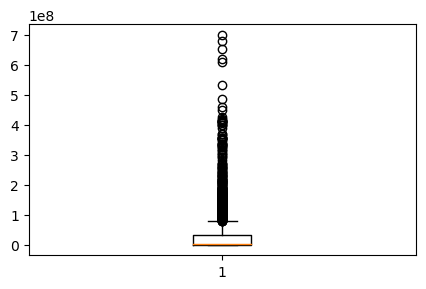

'\nThe outliers should be retained the domestic gross could be equated as the cost used\nin the production some productions could be heavily invested targeting\nto get the best out of its airing/production or depending on the cast involved or creation of scenes\n'

In [72]:
#Checking for outliers in column domestic gross
fig = plt.figure(figsize =(5, 3))
 
# Creating plot
plt.boxplot(combined_df.domestic_gross)
 
# show plot
plt.show()

"""
The outliers should be retained the domestic gross could be equated as the cost used
in the production some productions could be heavily invested targeting
to get the best out of its airing/production or depending on the cast involved or creation of scenes
"""

# Data Exploration

What to explore;

1.Which genre has the highest number of production ?

2.What are some of the most common studios used in production ?

2.Does the domestic gross(budget) affect the ratings ?

3.What are the correlations of different genres and other attributes ?

## Univariate Analysis

In [73]:
# Create a new dataframe with the count of movies per genre
genres_counts = combined_df['genres'].value_counts().reset_index(name='count').rename(columns={'index': 'title'})
print(genres_counts)

                         genres  count
0                         Drama    317
1                  Comedy,Drama    133
2          Comedy,Drama,Romance    132
3                 Drama,Romance    112
4                   Documentary    110
..                          ...    ...
318             Crime,Drama,War      1
319  Biography,History,Thriller      1
320   Documentary,Drama,Romance      1
321      Documentary,Drama,News      1
322    Adventure,Comedy,Western      1

[323 rows x 2 columns]


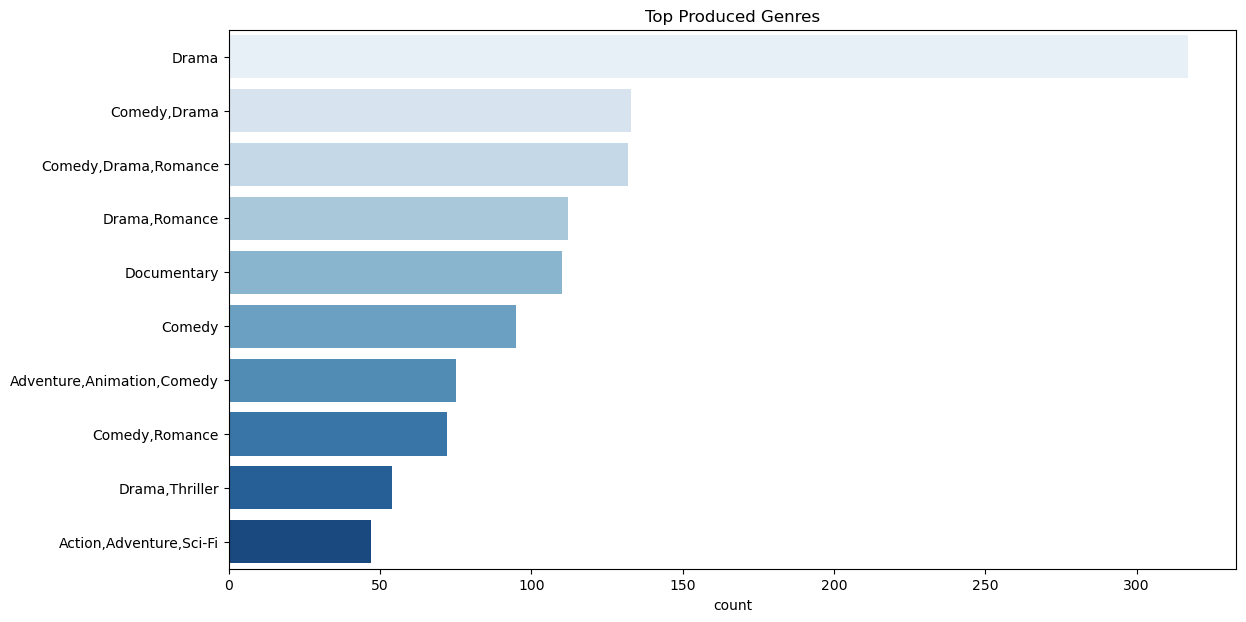

In [74]:
#Plotting the top produced genres from the dataframe based on the title of the movie,ordering and limiting to top10
Seperated_Genres = combined_df[combined_df.genres != 'Notlisted'].set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top Produced Genres')
sns.countplot(y = Seperated_Genres, order=Seperated_Genres.value_counts().index[:10], palette='Blues')
plt.show()

In [75]:
#counting the occurrence of each studio mention in the dataframe
combined_df.studio.value_counts()

#Printing the fisrt 10 values in a dictionary that holds  the sorted count values
studio_count = combined_df['studio'].value_counts().sort_values(ascending=False).head(10).to_dict()
studio_count

{'Uni.': 156,
 'IFC': 145,
 'Fox': 138,
 'WB': 119,
 'Magn.': 117,
 'SPC': 110,
 'BV': 97,
 'LGF': 91,
 'Par.': 90,
 'Sony': 89}

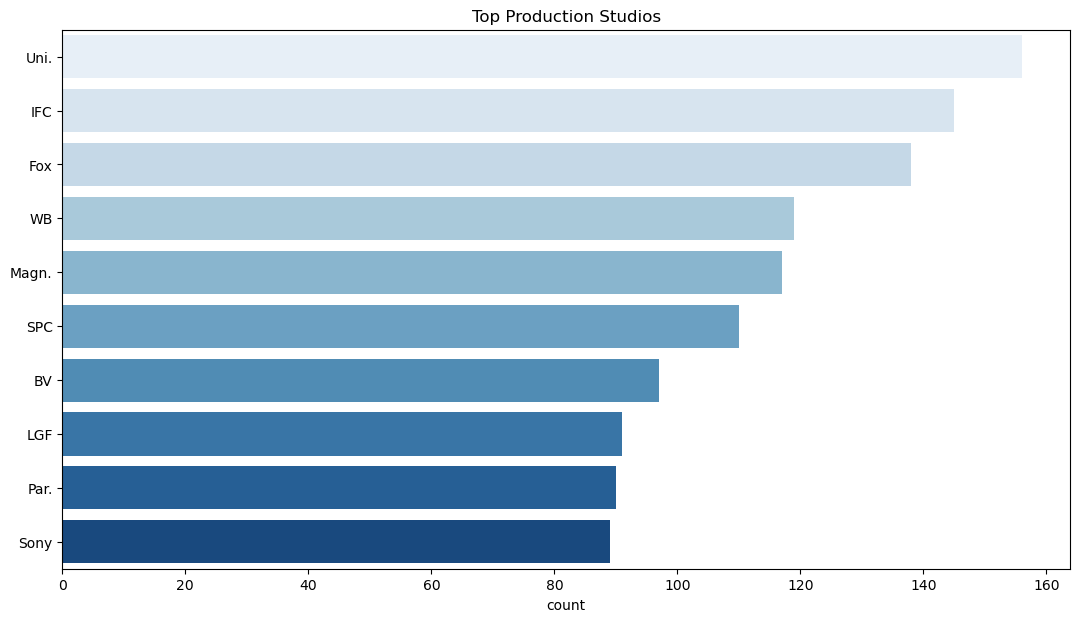

In [86]:
#Plotting the top produced genres from the dataframe based on the title of the movie,ordering and limiting to top10
Seperated_studios = combined_df[combined_df.studio != 'Notlisted'].set_index('title').studio.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top Production Studios')
sns.countplot(y = Seperated_studios, order=Seperated_studios.value_counts().index[:10], palette='Blues')
plt.show()

In [77]:
# Create a new dataframe with the count of movies per genre
domestic_gross_counts = combined_df['domestic_gross'].value_counts().reset_index(name='count').rename(columns={'index': 'title'})
print(domestic_gross_counts) 

      domestic_gross  count
0          1300000.0     31
1          1000000.0     28
2          1800000.0     28
3          1100000.0     27
4          1400000.0     24
...              ...    ...
1518     115200000.0      1
1519         82700.0      1
1520         74100.0      1
1521         52800.0      1
1522        616000.0      1

[1523 rows x 2 columns]


In [83]:
#Selecting the top 10 values based on a specific column
domestic_gross_top_10 = domestic_gross_counts.nlargest(10,domestic_gross_counts)
domestic_gross_top_10

,domestic_gross,count
1174,700100000.0,1
890,678800000.0,1
1128,652300000.0,1
1432,620200000.0,1
810,608600000.0,1
918,532200000.0,1
933,486300000.0,1
835,459000000.0,1
1062,448100000.0,1
1476,424700000.0,1


## Bivariate Analysis

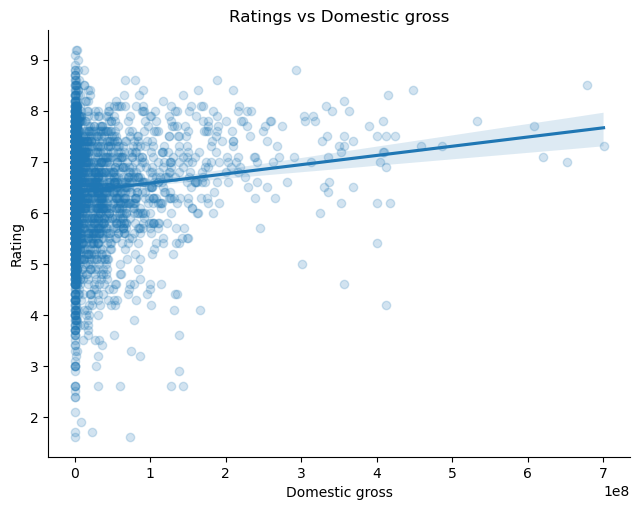

In [79]:
#Plotting a scatter plot with domestic gross and averagerating
sns.lmplot(x="domestic_gross", 
           y="averagerating", 
           data= combined_df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Ratings vs Domestic gross')
plt.xlabel('Domestic gross')
plt.ylabel('Rating');

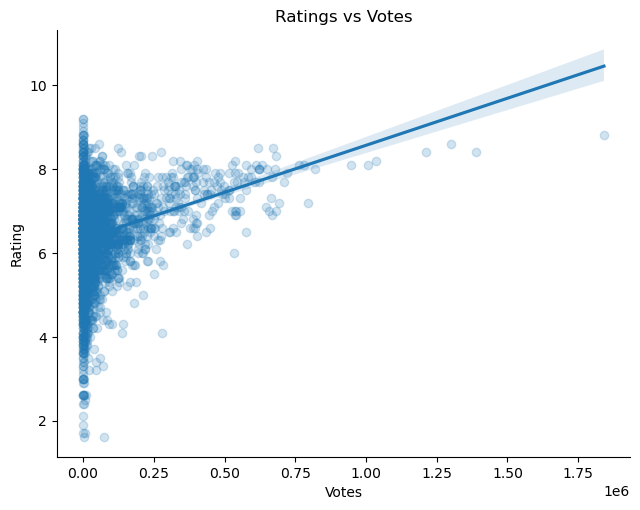

In [95]:
#Plotting a scatter plot with domestic gross and averagerating
sns.lmplot(x="numvotes", 
           y="averagerating", 
           data= combined_df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Ratings vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating');

## Mulitivariate analysis

In [80]:
# Filter numerical columns
numerical_data = combined_df.select_dtypes(include=['int', 'float'])

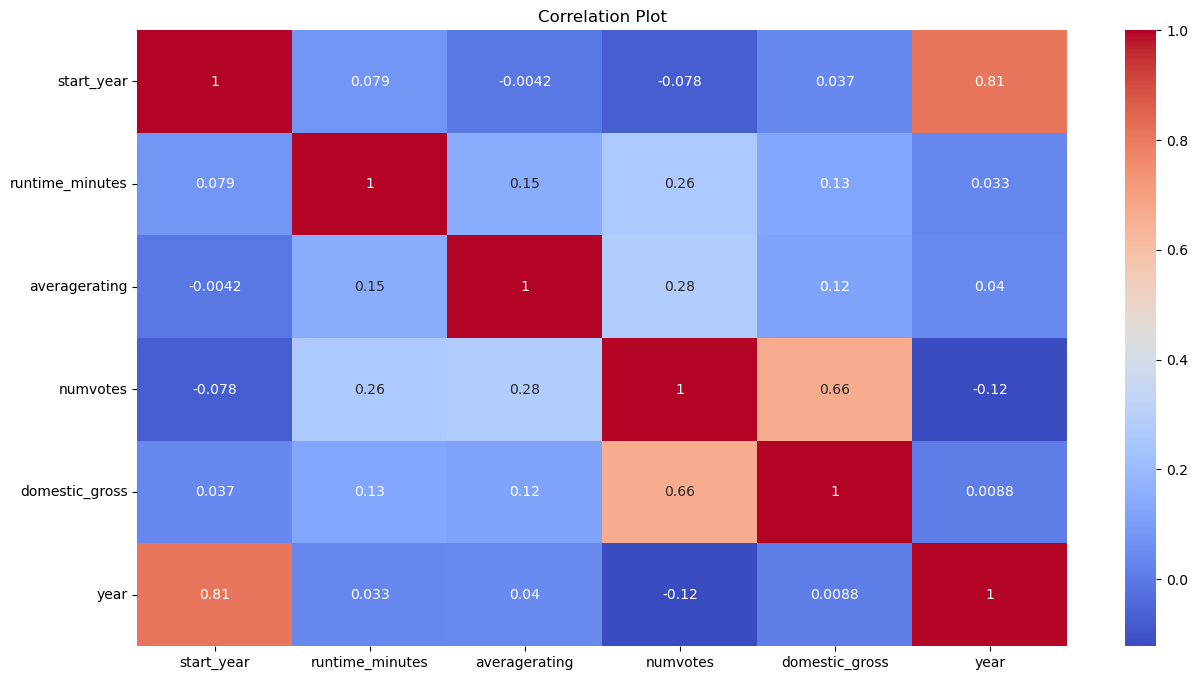

In [96]:
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

The light shades show a high correlation between the elements while dark shades show a low correlation between the elements.For example, the averagerating has a weak positive correlation with total_gross meaning that a high rating indicates a descent gross return.

### *Conclusions*

We have drawn many interesting inferences from the dataset,here's a summary of the few of them:

The most genre type is drama with the least as war,

The amount of Domestic Gross/Budget does affect the rating of the movie,

Some Genre Combinations are more relatable to each other unlike others.

The number of votes also affect the rating of the movie.
### *Recommendations*

The studios that should be invested in should be either Universal, IFC or Fox.

The company should consider starting with the production of drama genre movies.

The company should conduct a survey to see which movies are popular.